In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# DADOS

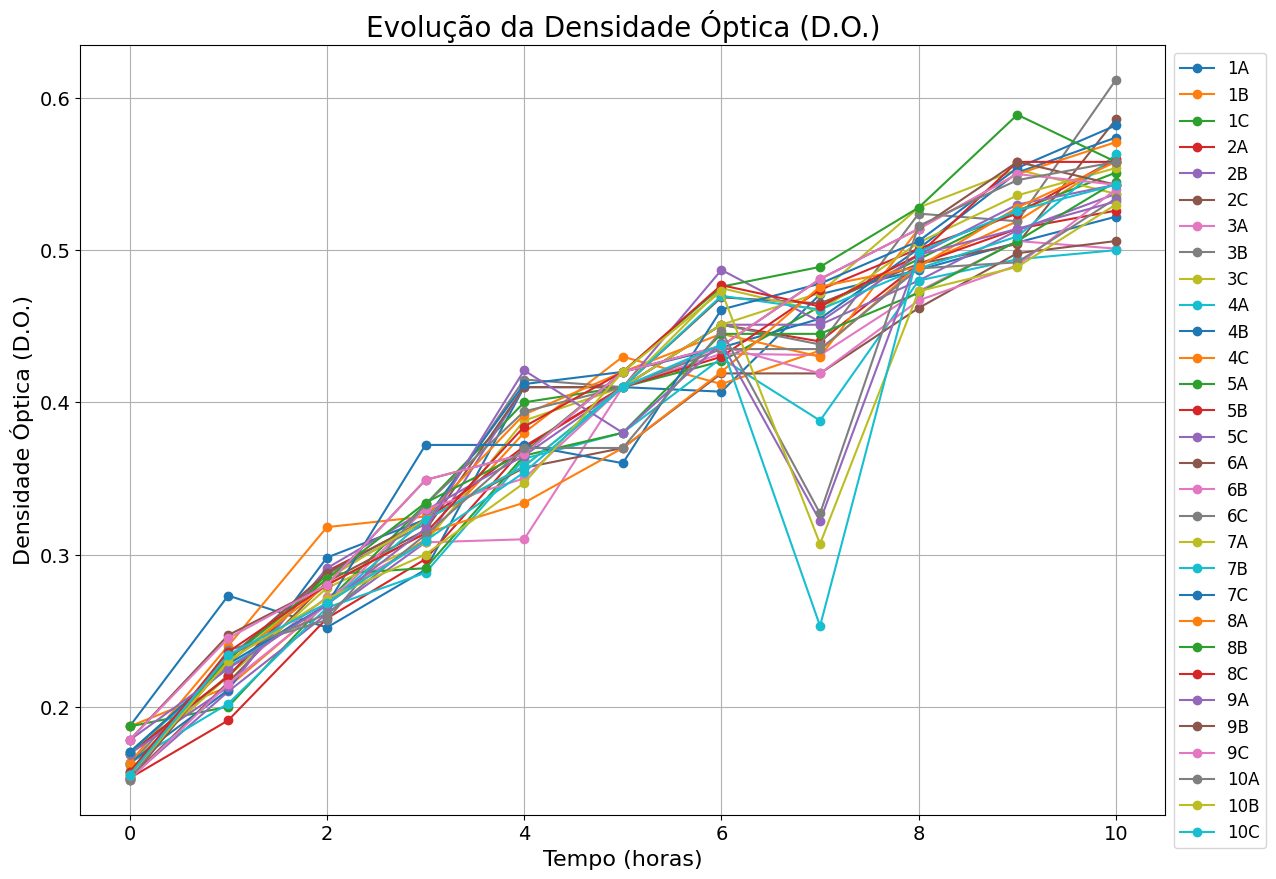

Imagem salva em: evolucao_densidade_optica.png


In [2]:
# Dados completos para todas as amostras
dados = {
    "Tempo": ["00:00", "01:00", "02:00", "03:00", "04:00", "05:00", "06:00", "07:00", "08:00", "09:00", "10:00"],
    "1A": [0.187, 0.273, 0.252, 0.29, 0.41, 0.41, 0.407, 0.471, 0.487, 0.505, 0.522],
    "1B": [0.187, 0.213, 0.268, 0.31, 0.38, 0.43, 0.412, 0.434, 0.49, 0.519, 0.56],
    "1C": [0.187, 0.2, 0.269, 0.333, 0.4, 0.41, 0.427, 0.463, 0.494, 0.526, 0.551],
    "2A": [0.153, 0.191, 0.258, 0.297, 0.37, 0.41, 0.451, 0.44, 0.491, 0.514, 0.526],
    "2B": [0.153, 0.21, 0.261, 0.308, 0.41, 0.41, 0.451, 0.451, 0.48, 0.513, 0.537],
    "2C": [0.153, 0.216, 0.282, 0.316, 0.41, 0.41, 0.469, 0.465, 0.491, 0.504, 0.586],
    "3A": [0.162, 0.221, 0.272, 0.308, 0.31, 0.41, 0.432, 0.431, 0.473, 0.506, 0.501],
    "3B": [0.162, 0.232, 0.287, 0.32, 0.415, 0.41, 0.451, 0.438, 0.524, 0.519, 0.612],
    "3C": [0.162, 0.22, 0.278, 0.308, 0.388, 0.41, 0.451, 0.472, 0.528, 0.553, 0.537],
    "4A": [0.163, 0.202, 0.265, 0.288, 0.363, 0.38, 0.429, 0.388, 0.48, 0.494, 0.5],
    "4B": [0.163, 0.211, 0.298, 0.323, 0.412, 0.42, 0.436, 0.455, 0.501, 0.551, 0.574],
    "4C": [0.163, 0.24, 0.318, 0.325, 0.392, 0.42, 0.445, 0.43, 0.514, 0.55, 0.571],
    "5A": [0.169, 0.22, 0.287, 0.291, 0.365, 0.38, 0.445, 0.445, 0.472, 0.506, 0.545],
    "5B": [0.169, 0.22, 0.289, 0.322, 0.371, 0.41, 0.43, 0.474, 0.501, 0.524, 0.56],
    "5C": [0.169, 0.213, 0.291, 0.329, 0.365, 0.41, 0.487, 0.453, 0.497, 0.53, 0.543],
    "6A": [0.152, 0.231, 0.288, 0.323, 0.357, 0.37, 0.419, 0.419, 0.462, 0.498, 0.506],
    "6B": [0.152, 0.215, 0.267, 0.33, 0.35, 0.41, 0.437, 0.419, 0.467, 0.49, 0.54],
    "6C": [0.152, 0.237, 0.257, 0.333, 0.394, 0.41, 0.435, 0.435, 0.488, 0.492, 0.534],
    "7A": [0.17, 0.228, 0.284, 0.323, 0.358, 0.41, 0.475, 0.46, 0.505, 0.536, 0.554],
    "7B": [0.17, 0.226, 0.267, 0.323, 0.358, 0.41, 0.47, 0.461, 0.488, 0.509, 0.563],
    "7C": [0.17, 0.228, 0.267, 0.372, 0.372, 0.36, 0.461, 0.478, 0.506, 0.554, 0.582],
    "8A": [0.157, 0.229, 0.28, 0.314, 0.334, 0.37, 0.42, 0.476, 0.489, 0.528, 0.558],
    "8B": [0.157, 0.231, 0.284, 0.334, 0.367, 0.42, 0.476, 0.489, 0.528, 0.589, 0.558],
    "8C": [0.157, 0.236, 0.28, 0.314, 0.384, 0.42, 0.477, 0.463, 0.497, 0.558, 0.558],
    "9A": [0.178, 0.225, 0.267, 0.317, 0.421, 0.38, 0.439, 0.322, 0.497, 0.514, 0.532],
    "9B": [0.178, 0.247, 0.28, 0.349, 0.366, 0.42, 0.437, 0.481, 0.514, 0.558, 0.543],
    "9C": [0.178, 0.245, 0.28, 0.349, 0.366, 0.42, 0.437, 0.481, 0.514, 0.55, 0.543],
    "10A": [0.155, 0.234, 0.261, 0.313, 0.37, 0.37, 0.447, 0.327, 0.516, 0.546, 0.558],
    "10B": [0.155, 0.23, 0.271, 0.3, 0.347, 0.42, 0.473, 0.307, 0.473, 0.489, 0.53],
    "10C": [0.155, 0.234, 0.268, 0.309, 0.354, 0.41, 0.438, 0.253, 0.499, 0.526, 0.543]
}

# Criando um DataFrame
df = pd.DataFrame(dados)

# Convertendo a coluna 'Tempo' para um formato de hora
df['Tempo'] = pd.to_timedelta(df['Tempo'] + ':00').dt.total_seconds() / 3600  # convertendo para horas

# Plotando os resultados para todas as amostras
plt.figure(figsize=(14, 10))
for coluna in df.columns[1:]:  # Ignorar a primeira coluna de tempo e iterar sobre todas as amostras
    plt.plot(df['Tempo'], df[coluna], marker='o', linestyle='-', label=coluna)

plt.title('Evolução da Densidade Óptica (D.O.)', fontsize=20)
plt.xlabel('Tempo (horas)', fontsize=16)
plt.ylabel('Densidade Óptica (D.O.)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize=12)  # Ajusta a legenda para fora do gráfico

# Salvar a figura como um arquivo de imagem
output_path = 'evolucao_densidade_optica.png'
#plt.savefig(output_path, bbox_inches='tight')
plt.show()

print(f'Imagem salva em: {output_path}')

# Estatística

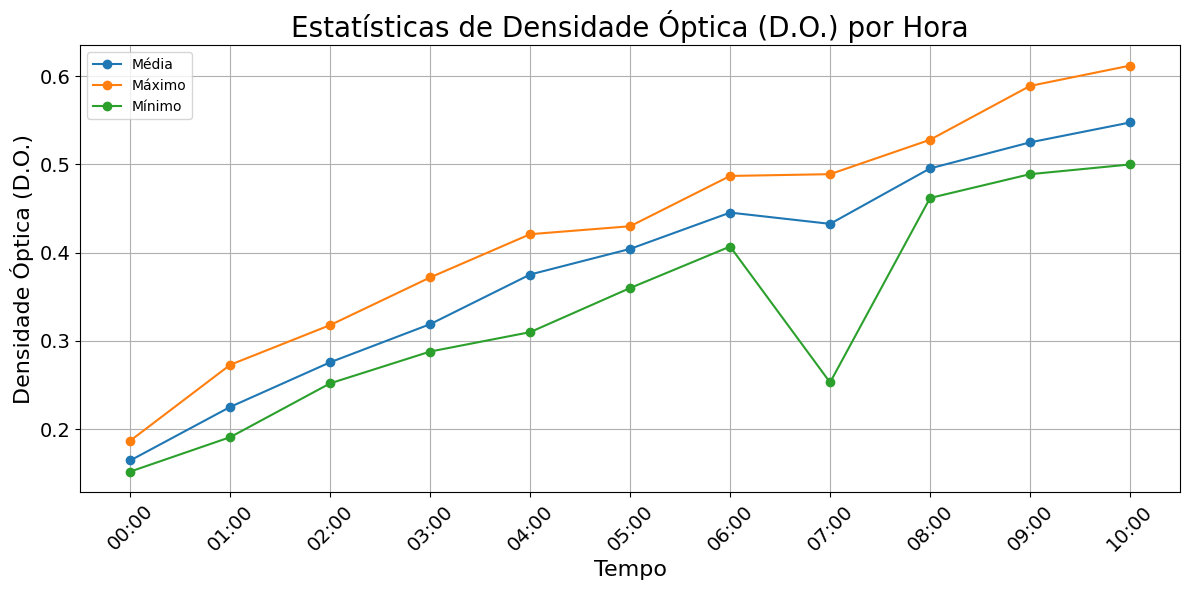

Imagem salva em: estatisticas_densidade_optica_grafico.png


In [3]:
# Criando um DataFrame
df = pd.DataFrame(dados)

# Transpondo o DataFrame para facilitar a agregação por horas
df = df.set_index('Tempo').transpose()

# Calculando estatísticas por hora
mean_values = df.mean()
median_values = df.median()
max_values = df.max()
min_values = df.min()

# Preparando os dados para a tabela
cell_text = []
columns = ['Hora', 'Média', 'Mediana', 'Máximo', 'Mínimo']
for i, time in enumerate(mean_values.index):
    cell_text.append([time, f"{mean_values[i]:.3f}", f"{median_values[i]:.3f}", f"{max_values[i]:.3f}", f"{min_values[i]:.3f}"])

# Plotando as estatísticas
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(mean_values.index, mean_values, label='Média', marker='o')
#ax1.plot(median_values.index, median_values, label='Mediana', marker='o')
ax1.plot(max_values.index, max_values, label='Máximo', marker='o')
ax1.plot(min_values.index, min_values, label='Mínimo', marker='o')
ax1.set_title('Estatísticas de Densidade Óptica (D.O.) por Hora', fontsize=20)
ax1.set_xlabel('Tempo', fontsize=16)
ax1.set_ylabel('Densidade Óptica (D.O.)', fontsize=16)
ax1.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# Salvar a figura como um arquivo de imagem
output_path = 'estatisticas_densidade_optica_grafico.png'
#plt.savefig(output_path, bbox_inches='tight')
plt.show()

print(f'Imagem salva em: {output_path}')

# Malthus

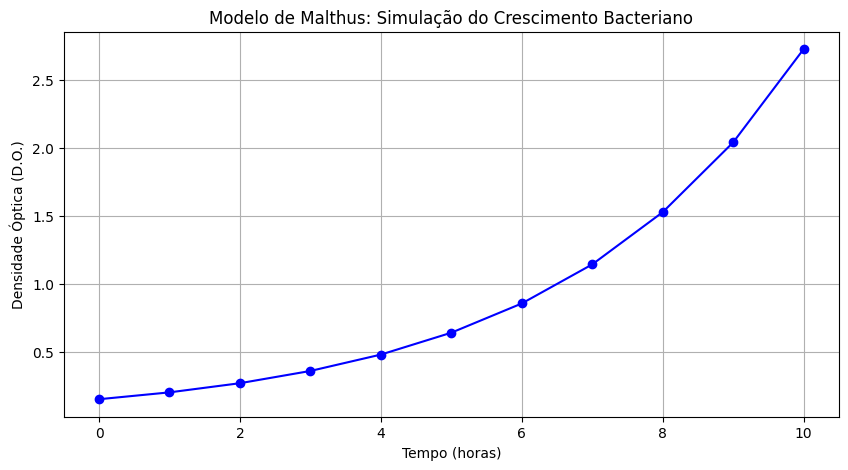

In [4]:
# Parâmetros iniciais
DO_inicial = 0.15
r = 0.29  # taxa de crescimento, ajuste conforme necessário
horas = 10

# Criação do vetor de tempo
tempo = np.arange(0, horas + 1)  # de 0 a 10 horas

# Cálculo da D.O. em cada ponto de tempo usando o modelo de Malthus
DO = DO_inicial * np.exp(r * tempo)

# Plotando os resultados
plt.figure(figsize=(10, 5))
plt.plot(tempo, DO, marker='o', linestyle='-', color='b')
plt.title('Modelo de Malthus: Simulação do Crescimento Bacteriano')
plt.xlabel('Tempo (horas)')
plt.ylabel('Densidade Óptica (D.O.)')
plt.grid(True)
# Salvar a figura como um arquivo de imagem
#output_path = 'MALTHUS10.png'
#plt.savefig(output_path, bbox_inches='tight')
plt.show()

#print(f'Imagem salva em: {output_path}')

# Verhulst

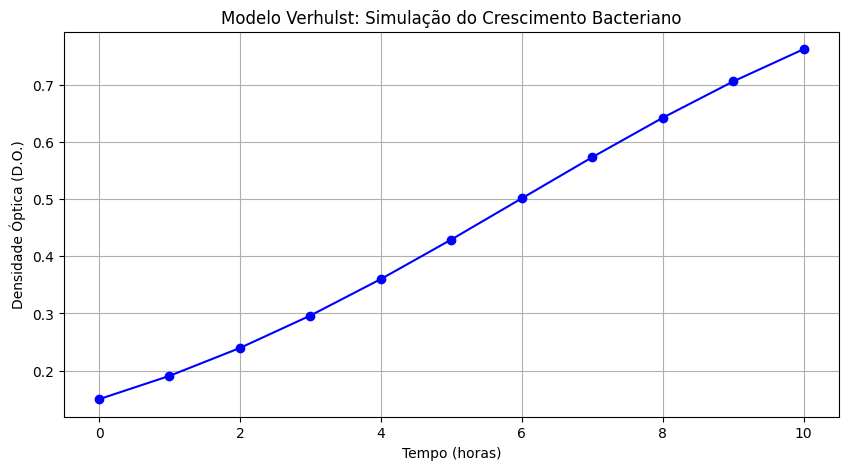

In [5]:
# Parâmetros iniciais
DO_inicial = 0.15
r = 0.29  # taxa de crescimento
K = 1.0  # capacidade de carga, D.O. máxima
horas = 10

# Criação do vetor de tempo
tempo = np.arange(0, horas + 1)  # de 0 a 10 horas

# Cálculo da D.O. em cada ponto de tempo usando o modelo logístico
DO = K * DO_inicial * np.exp(r * tempo) / (K + DO_inicial * (np.exp(r * tempo) - 1))

# Plotando os resultados
plt.figure(figsize=(10, 5))
plt.plot(tempo, DO, marker='o', linestyle='-', color='b')
plt.title('Modelo Verhulst: Simulação do Crescimento Bacteriano')
plt.xlabel('Tempo (horas)')
plt.ylabel('Densidade Óptica (D.O.)')
plt.grid(True)
# Salvar a figura como um arquivo de imagem
#output_path = 'VERHULST10.png'
#plt.savefig(output_path, bbox_inches='tight')
plt.show()

#print(f'Imagem salva em: {output_path}')

# Malthus + Estatística

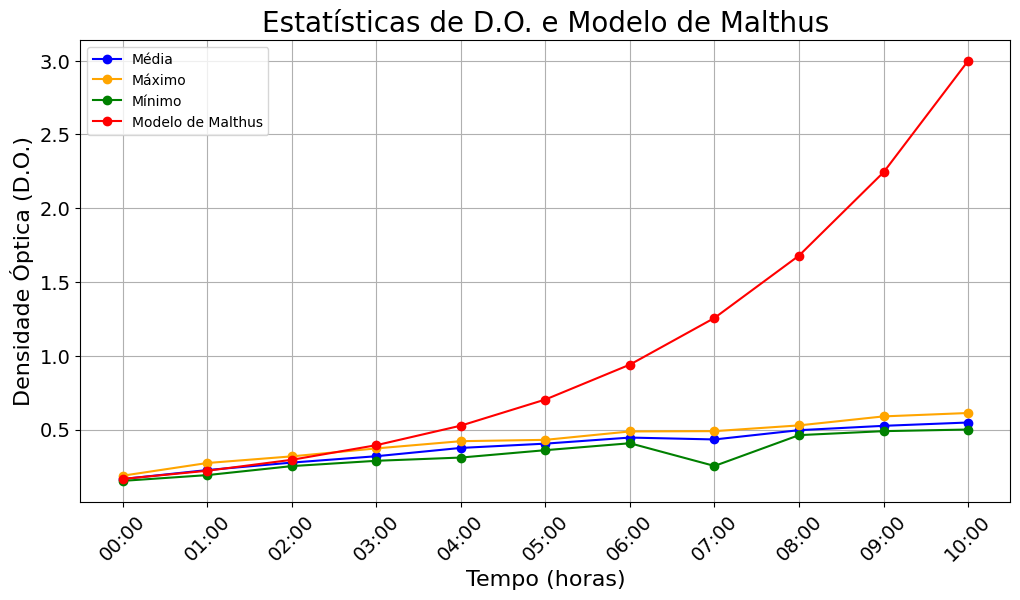

Imagem salva em: estatisticas_e_malthus_combined.png


In [6]:
# Parâmetros iniciais para o modelo de Malthus
DO_inicial = 0.165
r = 0.29  # taxa de crescimento, ajuste conforme necessário
horas = 10

# Criação do vetor de tempo
tempo = np.arange(0, horas + 1)  # de 0 a 10 horas

# Cálculo da D.O. em cada ponto de tempo usando o modelo de Malthus
DO = DO_inicial * np.exp(r * tempo)

# Plotando os resultados combinados
plt.figure(figsize=(12, 6))

# Estatísticas de D.O.
plt.plot(mean_values.index, mean_values, label='Média', marker='o', color='blue')
#plt.plot(median_values.index, median_values, label='Mediana', marker='o', color='green')
plt.plot(max_values.index, max_values, label='Máximo', marker='o', color='orange')
plt.plot(min_values.index, min_values, label='Mínimo', marker='o', color='green')

# Modelo de Malthus
plt.plot(tempo, DO, label='Modelo de Malthus', marker='o', linestyle='-', color='red')

plt.title('Estatísticas de D.O. e Modelo de Malthus', fontsize=20)
plt.xlabel('Tempo (horas)', fontsize=16)
plt.ylabel('Densidade Óptica (D.O.)', fontsize=16)
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

# Salvar a figura como um arquivo de imagem
output_path_combined = 'estatisticas_e_malthus_combined.png'
#plt.savefig(output_path_combined, bbox_inches='tight')
plt.show()

print(f'Imagem salva em: {output_path_combined}')

# Verhulst + Estatística

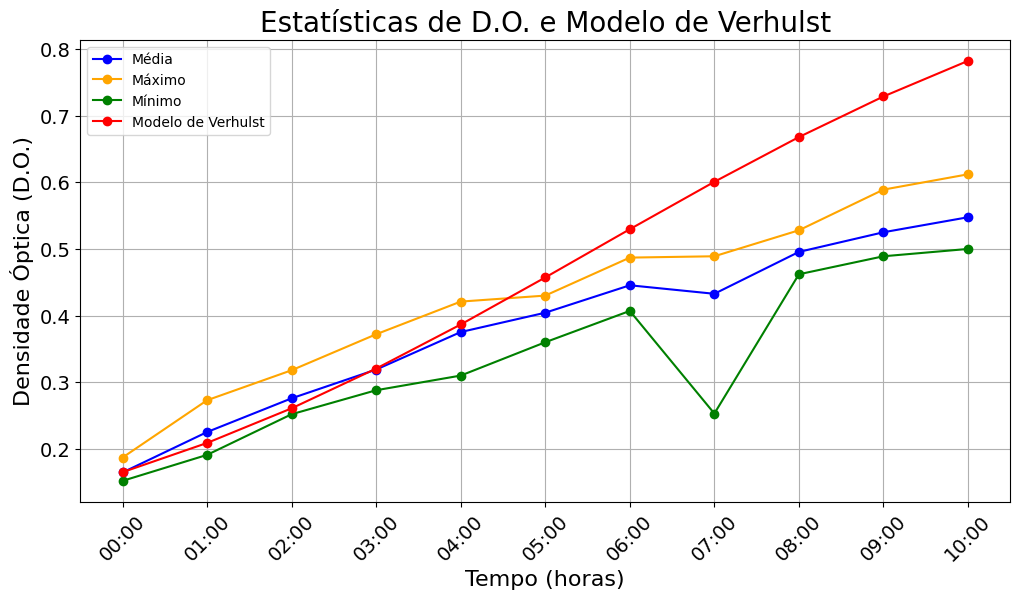

Imagem salva em: estatisticas_e_verhulst_combined.png


In [7]:
# Parâmetros iniciais para o modelo de Verhulst
DO_inicial = 0.165
r = 0.29  # taxa de crescimento
K = 1.0  # capacidade de carga, D.O. máxima
horas = 10

# Criação do vetor de tempo
tempo = np.arange(0, horas + 1)  # de 0 a 10 horas

# Cálculo da D.O. em cada ponto de tempo usando o modelo logístico
DO = K * DO_inicial * np.exp(r * tempo) / (K + DO_inicial * (np.exp(r * tempo) - 1))

# Plotando os resultados combinados
plt.figure(figsize=(12, 6))

# Estatísticas de D.O.
plt.plot(mean_values.index, mean_values, label='Média', marker='o', color='blue')
#plt.plot(median_values.index, median_values, label='Mediana', marker='o', color='green')
plt.plot(max_values.index, max_values, label='Máximo', marker='o', color='orange')
plt.plot(min_values.index, min_values, label='Mínimo', marker='o', color='green')

# Modelo de Verhulst
plt.plot(tempo, DO, label='Modelo de Verhulst', marker='o', linestyle='-', color='red')

plt.title('Estatísticas de D.O. e Modelo de Verhulst', fontsize=20)
plt.xlabel('Tempo (horas)', fontsize=16)
plt.ylabel('Densidade Óptica (D.O.)', fontsize=16)
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

# Salvar a figura como um arquivo de imagem
output_path_combined = 'estatisticas_e_verhulst_combined.png'
#plt.savefig(output_path_combined, bbox_inches='tight')
plt.show()

print(f'Imagem salva em: {output_path_combined}')

# Malthus Intervalar

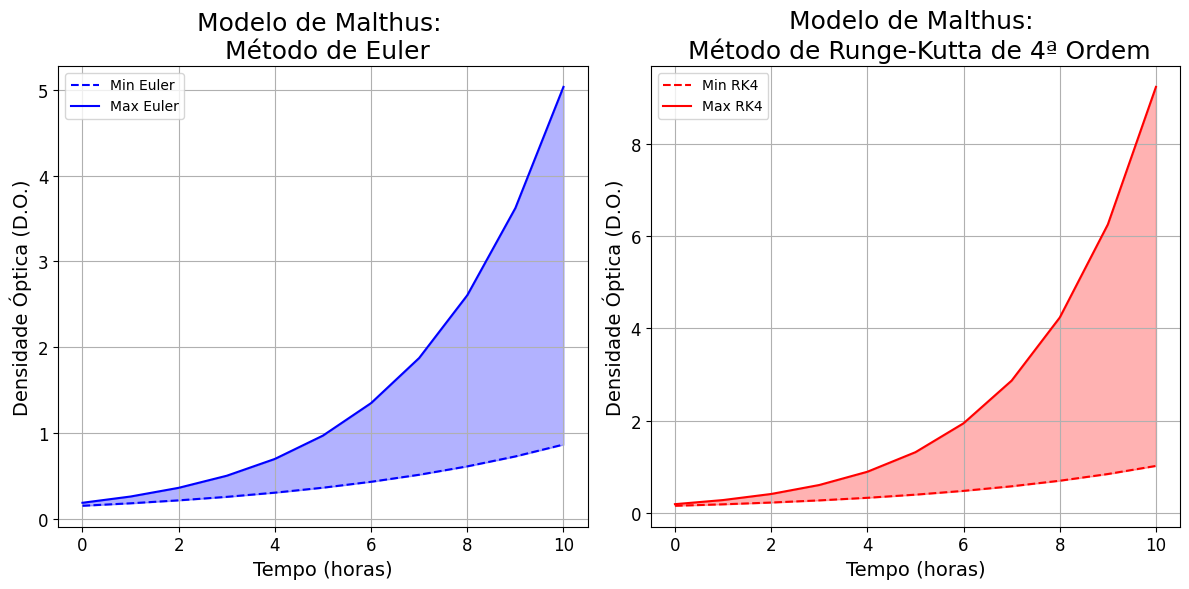

Imagem salva em: EDIMALTHUS24(DOeTAXA).png


In [8]:
DO_inicial_min = 0.152
DO_inicial_max = 0.187
r_min = 0.19  # taxa de crescimento mínima
r_max = 0.39  # taxa de crescimento máxima
horas = 10  # ajustar para 10 horas
h = 1  # passo temporal

# Função para calcular a derivada da D.O.
def f(DO, r):
    return r * DO

# Método de Euler Intervalar com D.O. inicial e r variáveis
def euler_intervalar_full_var(DO_inicial_min, DO_inicial_max, r_min, r_max, h, tempo):
    DO_min = np.zeros(len(tempo))
    DO_max = np.zeros(len(tempo))
    DO_min[0], DO_max[0] = DO_inicial_min, DO_inicial_max
    for i in range(1, len(tempo)):
        DO_min[i] = DO_min[i-1] + f(DO_min[i-1], r_min) * h
        DO_max[i] = DO_max[i-1] + f(DO_max[i-1], r_max) * h
    return DO_min, DO_max

# Método de Runge-Kutta de 4ª Ordem Intervalar com D.O. inicial e r variáveis
def runge_kutta_intervalar_full_var(DO_inicial_min, DO_inicial_max, r_min, r_max, h, tempo):
    DO_min = np.zeros(len(tempo))
    DO_max = np.zeros(len(tempo))
    DO_min[0], DO_max[0] = DO_inicial_min, DO_inicial_max
    for i in range(1, len(tempo)):
        # Para DO_min
        k1_min = f(DO_min[i-1], r_min)
        k2_min = f(DO_min[i-1] + 0.5 * k1_min * h, r_min)
        k3_min = f(DO_min[i-1] + 0.5 * k2_min * h, r_min)
        k4_min = f(DO_min[i-1] + k3_min * h, r_min)
        DO_min[i] = DO_min[i-1] + (k1_min + 2*k2_min + 2*k3_min + k4_min) * h / 6
        # Para DO_max
        k1_max = f(DO_max[i-1], r_max)
        k2_max = f(DO_max[i-1] + 0.5 * k1_max * h, r_max)
        k3_max = f(DO_max[i-1] + 0.5 * k2_max * h, r_max)
        k4_max = f(DO_max[i-1] + k3_max * h, r_max)
        DO_max[i] = DO_max[i-1] + (k1_max + 2*k2_max + 2*k3_max + k4_max) * h / 6
    return DO_min, DO_max

# Parâmetros para a taxa de crescimento
r_min = 0.19  # taxa de crescimento mínima
r_max = 0.39  # taxa de crescimento máxima

# Cálculo usando Euler Intervalar e RK4 Intervalar com D.O. inicial e r variáveis
DO_euler_min_full_var, DO_euler_max_full_var = euler_intervalar_full_var(DO_inicial_min, DO_inicial_max, r_min, r_max, h, tempo)
DO_runge_kutta_min_full_var, DO_runge_kutta_max_full_var = runge_kutta_intervalar_full_var(DO_inicial_min, DO_inicial_max, r_min, r_max, h, tempo)

# Plotando os resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.fill_between(tempo, DO_euler_min_full_var, DO_euler_max_full_var, color='blue', alpha=0.3)
plt.plot(tempo, DO_euler_min_full_var, 'b--', label='Min Euler')
plt.plot(tempo, DO_euler_max_full_var, 'b-', label='Max Euler')
plt.title('Modelo de Malthus: \n Método de Euler', fontsize=18)
plt.xlabel('Tempo (horas)', fontsize=14)
plt.ylabel('Densidade Óptica (D.O.)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.fill_between(tempo, DO_runge_kutta_min_full_var, DO_runge_kutta_max_full_var, color='red', alpha=0.3)
plt.plot(tempo, DO_runge_kutta_min_full_var, 'r--', label='Min RK4')
plt.plot(tempo, DO_runge_kutta_max_full_var, 'r-', label='Max RK4')
plt.title('Modelo de Malthus: \n Método de Runge-Kutta de 4ª Ordem', fontsize=18)
plt.xlabel('Tempo (horas)', fontsize=14)
plt.ylabel('Densidade Óptica (D.O.)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
# Salvar a figura como um arquivo de imagem
output_path = 'EDIMALTHUS24(DOeTAXA).png'
#plt.savefig(output_path, bbox_inches='tight')
plt.show()

print(f'Imagem salva em: {output_path}')

# Verhulst Intervalar

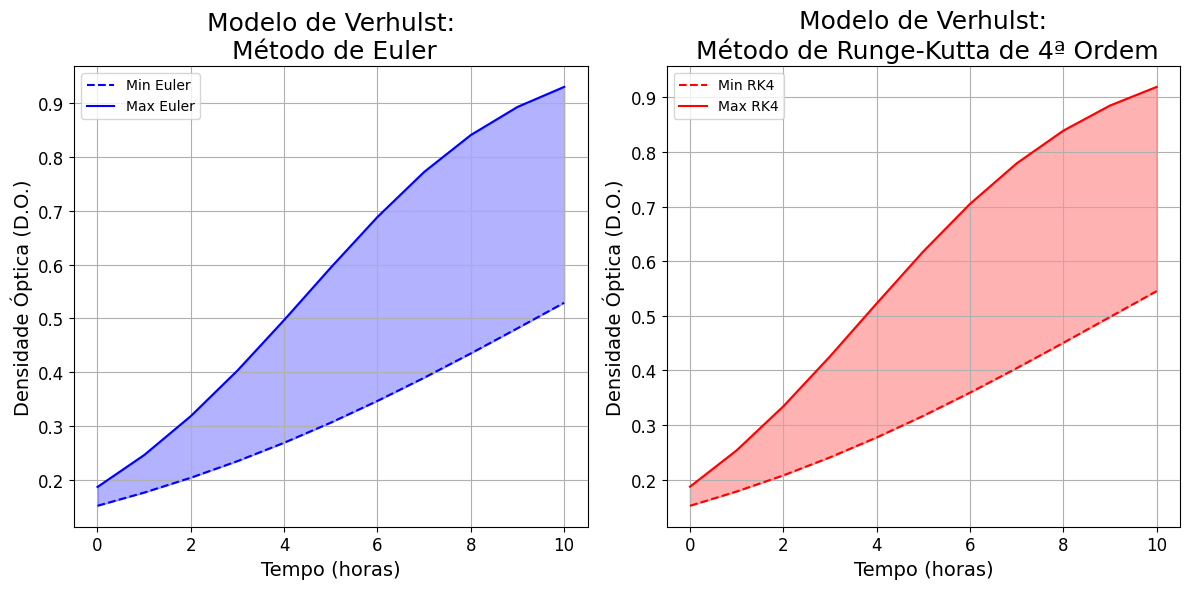

Imagem salva em: EDIVERHULST24(DOeTAXA).png


In [9]:
# Função para calcular a derivada da D.O. no modelo logístico
def f_verhulst(DO, r, K):
    return r * DO * (1 - DO / K)

# Parâmetros iniciais ajustados
DO_inicial_min = 0.152
DO_inicial_max = 0.187
r_min = 0.19  # taxa de crescimento mínima
r_max = 0.39  # taxa de crescimento máxima
K = 1.0  # capacidade de suporte máxima (saturação)
horas = 10
h = 1  # passo temporal

# Função para calcular a derivada da D.O. no modelo logístico
def f_verhulst(DO, r, K):
    return r * DO * (1 - DO / K)

# Método de Euler Intervalar com D.O. inicial e r variáveis e modelo logístico
def euler_intervalar_full_var(DO_inicial_min, DO_inicial_max, r_min, r_max, h, tempo, K):
    DO_min = np.zeros(len(tempo))
    DO_max = np.zeros(len(tempo))
    DO_min[0], DO_max[0] = DO_inicial_min, DO_inicial_max
    for i in range(1, len(tempo)):
        DO_min[i] = DO_min[i-1] + f_verhulst(DO_min[i-1], r_min, K) * h
        DO_max[i] = DO_max[i-1] + f_verhulst(DO_max[i-1], r_max, K) * h
    return DO_min, DO_max

# Método de Runge-Kutta de 4ª Ordem Intervalar com D.O. inicial e r variáveis e modelo logístico
def runge_kutta_intervalar_full_var(DO_inicial_min, DO_inicial_max, r_min, r_max, h, tempo, K):
    DO_min = np.zeros(len(tempo))
    DO_max = np.zeros(len(tempo))
    DO_min[0], DO_max[0] = DO_inicial_min, DO_inicial_max
    for i in range(1, len(tempo)):
        # Para DO_min
        k1_min = f_verhulst(DO_min[i-1], r_min, K)
        k2_min = f_verhulst(DO_min[i-1] + 0.5 * k1_min * h, r_min, K)
        k3_min = f_verhulst(DO_min[i-1] + 0.5 * k2_min * h, r_min, K)
        k4_min = f_verhulst(DO_min[i-1] + k3_min * h, r_min, K)
        DO_min[i] = DO_min[i-1] + (k1_min + 2*k2_min + 2*k3_min + k4_min) * h / 6
        # Para DO_max
        k1_max = f_verhulst(DO_max[i-1], r_max, K)
        k2_max = f_verhulst(DO_max[i-1] + 0.5 * k1_max * h, r_max, K)
        k3_max = f_verhulst(DO_max[i-1] + 0.5 * k2_max * h, r_max, K)
        k4_max = f_verhulst(DO_max[i-1] + k3_max * h, r_max, K)
        DO_max[i] = DO_max[i-1] + (k1_max + 2*k2_max + 2*k3_max + k4_max) * h / 6
    return DO_min, DO_max

tempo = np.arange(0, horas + 1)  # de 0 a 10 horas

# Cálculo usando Euler Intervalar e RK4 Intervalar com D.O. inicial e r variáveis
DO_euler_min_full_var, DO_euler_max_full_var = euler_intervalar_full_var(DO_inicial_min, DO_inicial_max, r_min, r_max, h, tempo, K)
DO_runge_kutta_min_full_var, DO_runge_kutta_max_full_var = runge_kutta_intervalar_full_var(DO_inicial_min, DO_inicial_max, r_min, r_max, h, tempo, K)

# Plotando os resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.fill_between(tempo, DO_euler_min_full_var, DO_euler_max_full_var, color='blue', alpha=0.3)
plt.plot(tempo, DO_euler_min_full_var, 'b--', label='Min Euler')
plt.plot(tempo, DO_euler_max_full_var, 'b-', label='Max Euler')
plt.title('Modelo de Verhulst:\n Método de Euler', fontsize=18)
plt.xlabel('Tempo (horas)', fontsize=14)
plt.ylabel('Densidade Óptica (D.O.)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.fill_between(tempo, DO_runge_kutta_min_full_var, DO_runge_kutta_max_full_var, color='red', alpha=0.3)
plt.plot(tempo, DO_runge_kutta_min_full_var, 'r--', label='Min RK4')
plt.plot(tempo, DO_runge_kutta_max_full_var, 'r-', label='Max RK4')
plt.title('Modelo de Verhulst:\n Método de Runge-Kutta de 4ª Ordem', fontsize=18)
plt.xlabel('Tempo (horas)', fontsize=14)
plt.ylabel('Densidade Óptica (D.O.)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
# Salvar a figura como um arquivo de imagem
output_path = 'EDIVERHULST24(DOeTAXA).png'
#plt.savefig(output_path, bbox_inches='tight')
plt.show()

print(f'Imagem salva em: {output_path}')

# Malthus Intervalar + Dados

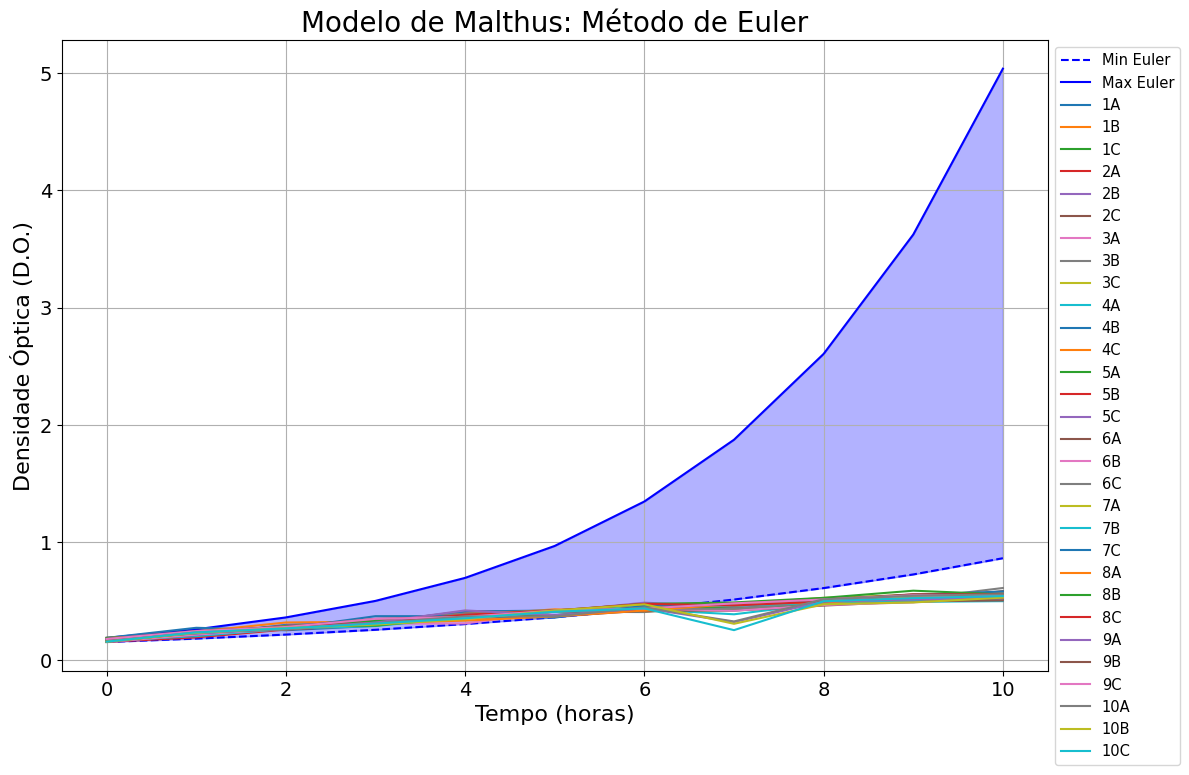

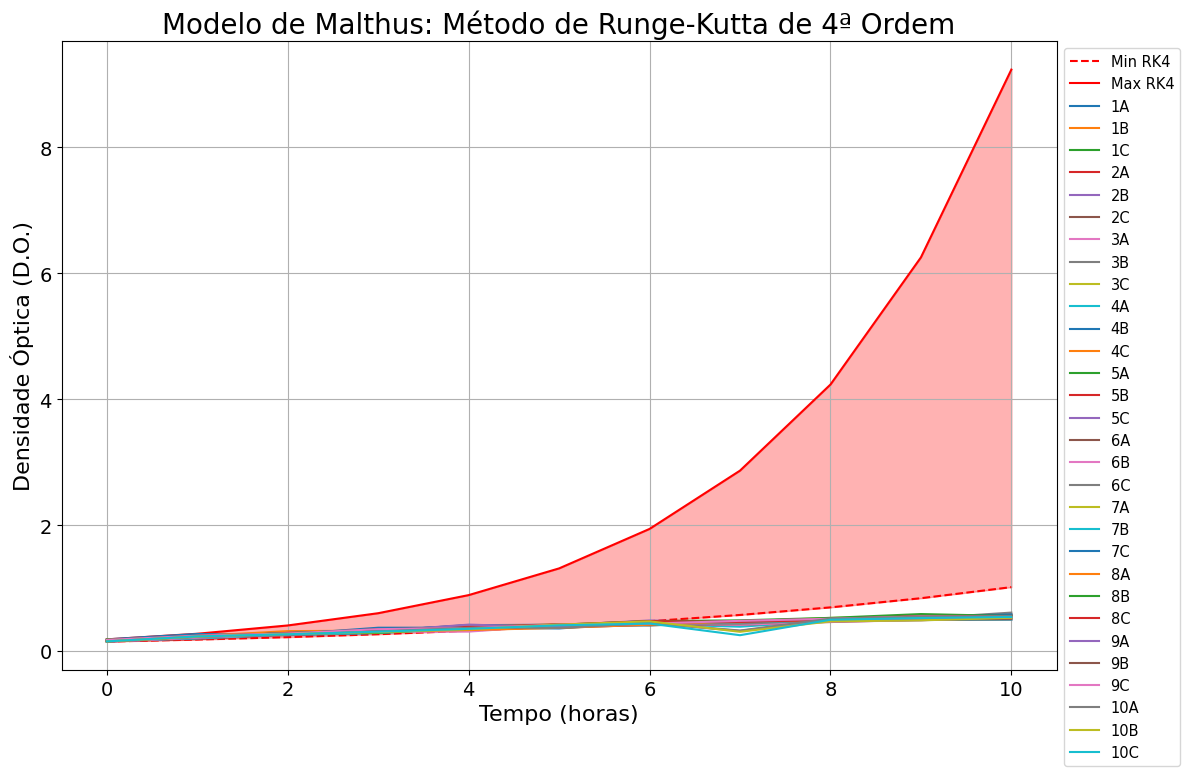

In [10]:
# Função para calcular a derivada da D.O.
def f(DO, r):
    return r * DO

# Método de Euler Intervalar com D.O. inicial e r variáveis
def euler_intervalar_full_var(DO_inicial_min, DO_inicial_max, r_min, r_max, h, tempo):
    DO_min = np.zeros(len(tempo))
    DO_max = np.zeros(len(tempo))
    DO_min[0], DO_max[0] = DO_inicial_min, DO_inicial_max
    for i in range(1, len(tempo)):
        DO_min[i] = DO_min[i-1] + f(DO_min[i-1], r_min) * h
        DO_max[i] = DO_max[i-1] + f(DO_max[i-1], r_max) * h
    return DO_min, DO_max

# Método de Runge-Kutta de 4ª Ordem Intervalar com D.O. inicial e r variáveis
def runge_kutta_intervalar_full_var(DO_inicial_min, DO_inicial_max, r_min, r_max, h, tempo):
    DO_min = np.zeros(len(tempo))
    DO_max = np.zeros(len(tempo))
    DO_min[0], DO_max[0] = DO_inicial_min, DO_inicial_max
    for i in range(1, len(tempo)):
        # Para DO_min
        k1_min = f(DO_min[i-1], r_min)
        k2_min = f(DO_min[i-1] + 0.5 * k1_min * h, r_min)
        k3_min = f(DO_min[i-1] + 0.5 * k2_min * h, r_min)
        k4_min = f(DO_min[i-1] + k3_min * h, r_min)
        DO_min[i] = DO_min[i-1] + (k1_min + 2*k2_min + 2*k3_min + k4_min) * h / 6
        # Para DO_max
        k1_max = f(DO_max[i-1], r_max)
        k2_max = f(DO_max[i-1] + 0.5 * k1_max * h, r_max)
        k3_max = f(DO_max[i-1] + 0.5 * k2_max * h, r_max)
        k4_max = f(DO_max[i-1] + k3_max * h, r_max)
        DO_max[i] = DO_max[i-1] + (k1_max + 2*k2_max + 2*k3_max + k4_max) * h / 6
    return DO_min, DO_max

# Parâmetros para a taxa de crescimento
r_min = 0.19  # taxa de crescimento mínima
r_max = 0.39  # taxa de crescimento máxima

# Definindo parâmetros
DO_inicial_min = 0.152
DO_inicial_max = 0.187
h = 1  # passo de tempo
tempo = np.arange(0, 11, h)  # tempo de 0 a 10 horas

# Cálculo usando Euler Intervalar e RK4 Intervalar com D.O. inicial e r variáveis
DO_euler_min_full_var, DO_euler_max_full_var = euler_intervalar_full_var(DO_inicial_min, DO_inicial_max, r_min, r_max, h, tempo)
DO_runge_kutta_min_full_var, DO_runge_kutta_max_full_var = runge_kutta_intervalar_full_var(DO_inicial_min, DO_inicial_max, r_min, r_max, h, tempo)

# Dados experimentais
dados = {
    "Tempo": ["00:00", "01:00", "02:00", "03:00", "04:00", "05:00", "06:00", "07:00", "08:00", "09:00", "10:00"],
    "1A": [0.187, 0.273, 0.252, 0.29, 0.41, 0.41, 0.407, 0.471, 0.487, 0.505, 0.522],
    "1B": [0.187, 0.213, 0.268, 0.31, 0.38, 0.43, 0.412, 0.434, 0.49, 0.519, 0.56],
    "1C": [0.187, 0.2, 0.269, 0.333, 0.4, 0.41, 0.427, 0.463, 0.494, 0.526, 0.551],
    "2A": [0.153, 0.191, 0.258, 0.297, 0.37, 0.41, 0.451, 0.44, 0.491, 0.514, 0.526],
    "2B": [0.153, 0.21, 0.261, 0.308, 0.41, 0.41, 0.451, 0.451, 0.48, 0.513, 0.537],
    "2C": [0.153, 0.216, 0.282, 0.316, 0.41, 0.41, 0.469, 0.465, 0.491, 0.504, 0.586],
    "3A": [0.162, 0.221, 0.272, 0.308, 0.31, 0.41, 0.432, 0.431, 0.473, 0.506, 0.501],
    "3B": [0.162, 0.232, 0.287, 0.32, 0.415, 0.41, 0.451, 0.438, 0.524, 0.519, 0.612],
    "3C": [0.162, 0.22, 0.278, 0.308, 0.388, 0.41, 0.451, 0.472, 0.528, 0.553, 0.537],
    "4A": [0.163, 0.202, 0.265, 0.288, 0.363, 0.38, 0.429, 0.388, 0.48, 0.494, 0.5],
    "4B": [0.163, 0.211, 0.298, 0.323, 0.412, 0.42, 0.436, 0.455, 0.501, 0.551, 0.574],
    "4C": [0.163, 0.24, 0.318, 0.325, 0.392, 0.42, 0.445, 0.43, 0.514, 0.55, 0.571],
    "5A": [0.169, 0.22, 0.287, 0.291, 0.365, 0.38, 0.445, 0.445, 0.472, 0.506, 0.545],
    "5B": [0.169, 0.22, 0.289, 0.322, 0.371, 0.41, 0.43, 0.474, 0.501, 0.524, 0.56],
    "5C": [0.169, 0.213, 0.291, 0.329, 0.365, 0.41, 0.487, 0.453, 0.497, 0.53, 0.543],
    "6A": [0.152, 0.231, 0.288, 0.323, 0.357, 0.37, 0.419, 0.419, 0.462, 0.498, 0.506],
    "6B": [0.152, 0.215, 0.267, 0.33, 0.35, 0.41, 0.437, 0.419, 0.467, 0.49, 0.54],
    "6C": [0.152, 0.237, 0.257, 0.333, 0.394, 0.41, 0.435, 0.435, 0.488, 0.492, 0.534],
    "7A": [0.17, 0.228, 0.284, 0.323, 0.358, 0.41, 0.475, 0.46, 0.505, 0.536, 0.554],
    "7B": [0.17, 0.226, 0.267, 0.323, 0.358, 0.41, 0.47, 0.461, 0.488, 0.509, 0.563],
    "7C": [0.17, 0.228, 0.267, 0.372, 0.372, 0.36, 0.461, 0.478, 0.506, 0.554, 0.582],
    "8A": [0.157, 0.229, 0.28, 0.314, 0.334, 0.37, 0.42, 0.476, 0.489, 0.528, 0.558],
    "8B": [0.157, 0.231, 0.284, 0.334, 0.367, 0.42, 0.476, 0.489, 0.528, 0.589, 0.558],
    "8C": [0.157, 0.236, 0.28, 0.314, 0.384, 0.42, 0.477, 0.463, 0.497, 0.558, 0.558],
    "9A": [0.178, 0.225, 0.267, 0.317, 0.421, 0.38, 0.439, 0.322, 0.497, 0.514, 0.532],
    "9B": [0.178, 0.247, 0.28, 0.349, 0.366, 0.42, 0.437, 0.481, 0.514, 0.558, 0.543],
    "9C": [0.178, 0.245, 0.28, 0.349, 0.366, 0.42, 0.437, 0.481, 0.514, 0.55, 0.543],
    "10A": [0.155, 0.234, 0.261, 0.313, 0.37, 0.37, 0.447, 0.327, 0.516, 0.546, 0.558],
    "10B": [0.155, 0.23, 0.271, 0.3, 0.347, 0.42, 0.473, 0.307, 0.473, 0.489, 0.53],
    "10C": [0.155, 0.234, 0.268, 0.309, 0.354, 0.41, 0.438, 0.253, 0.499, 0.526, 0.543]
}

# Plotando o resultado do Método de Euler
plt.figure(figsize=(12, 8))
plt.fill_between(tempo, DO_euler_min_full_var, DO_euler_max_full_var, color='blue', alpha=0.3)
plt.plot(tempo, DO_euler_min_full_var, 'b--', label='Min Euler')
plt.plot(tempo, DO_euler_max_full_var, 'b-', label='Max Euler')
for key in dados.keys():
    if key != "Tempo":
        plt.plot(tempo, dados[key], label=key)
plt.title('Modelo de Malthus: Método de Euler', fontsize=20)
plt.xlabel('Tempo (horas)', fontsize=16)
plt.ylabel('Densidade Óptica (D.O.)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10.5)
plt.grid(True)
plt.tight_layout()
# Salvar a figura como um arquivo de imagem
output_path_euler = 'modelo_malthus_euler.png'
#plt.savefig(output_path_euler, bbox_inches='tight')
plt.show()

# Plotando o resultado do Método de Runge-Kutta de 4ª Ordem
plt.figure(figsize=(12, 8))
plt.fill_between(tempo, DO_runge_kutta_min_full_var, DO_runge_kutta_max_full_var, color='red', alpha=0.3)
plt.plot(tempo, DO_runge_kutta_min_full_var, 'r--', label='Min RK4')
plt.plot(tempo, DO_runge_kutta_max_full_var, 'r-', label='Max RK4')
for key in dados.keys():
    if key != "Tempo":
        plt.plot(tempo, dados[key], label=key)
plt.title('Modelo de Malthus: Método de Runge-Kutta de 4ª Ordem', fontsize=20)
plt.xlabel('Tempo (horas)', fontsize=16)
plt.ylabel('Densidade Óptica (D.O.)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10.5)
plt.grid(True)
plt.tight_layout()
# Salvar a figura como um arquivo de imagem
output_path_rk4 = 'modelo_malthus_rk4.png'
#plt.savefig(output_path_rk4, bbox_inches='tight')
plt.show()

# Verhulst Intervalar + Dados

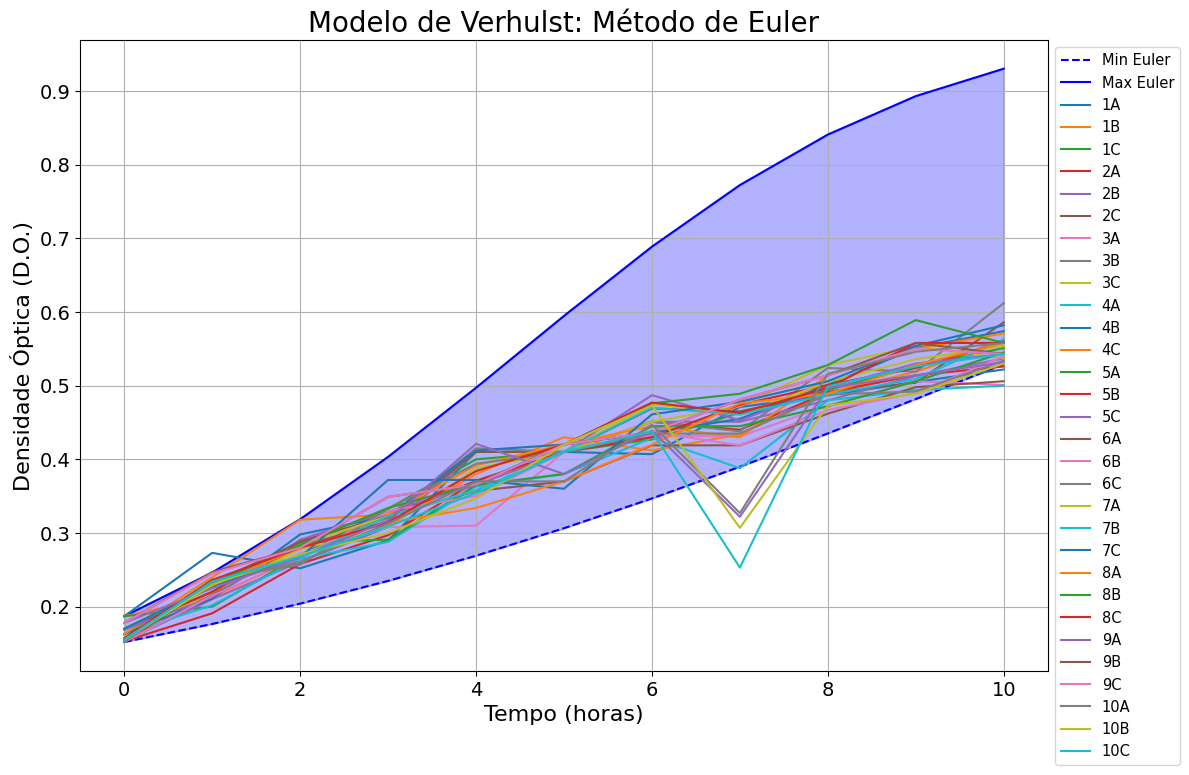

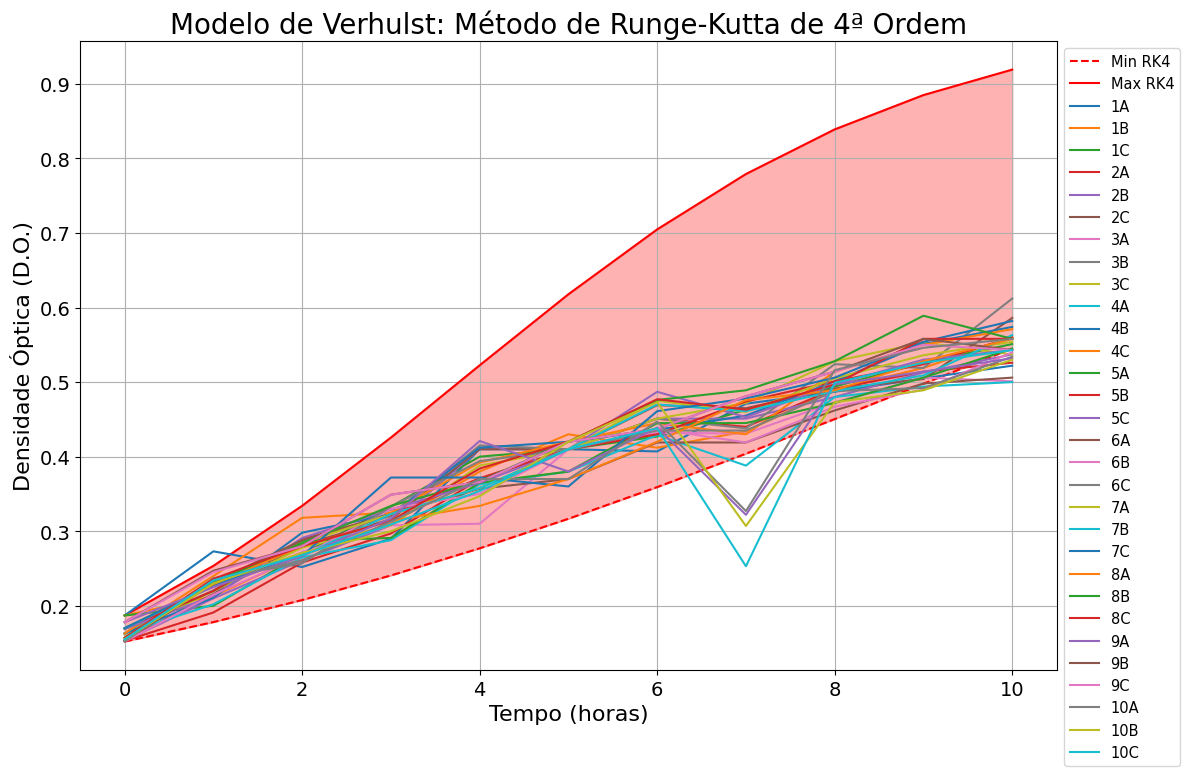

In [11]:
# Função para calcular a derivada da D.O. no modelo logístico
def f_verhulst(DO, r, K):
    return r * DO * (1 - DO / K)

# Método de Euler Intervalar com D.O. inicial e r variáveis e modelo logístico
def euler_intervalar_full_var(DO_inicial_min, DO_inicial_max, r_min, r_max, h, tempo, K):
    DO_min = np.zeros(len(tempo))
    DO_max = np.zeros(len(tempo))
    DO_min[0], DO_max[0] = DO_inicial_min, DO_inicial_max
    for i in range(1, len(tempo)):
        DO_min[i] = DO_min[i-1] + f_verhulst(DO_min[i-1], r_min, K) * h
        DO_max[i] = DO_max[i-1] + f_verhulst(DO_max[i-1], r_max, K) * h
    return DO_min, DO_max

# Método de Runge-Kutta de 4ª Ordem Intervalar com D.O. inicial e r variáveis e modelo logístico
def runge_kutta_intervalar_full_var(DO_inicial_min, DO_inicial_max, r_min, r_max, h, tempo, K):
    DO_min = np.zeros(len(tempo))
    DO_max = np.zeros(len(tempo))
    DO_min[0], DO_max[0] = DO_inicial_min, DO_inicial_max
    for i in range(1, len(tempo)):
        # Para DO_min
        k1_min = f_verhulst(DO_min[i-1], r_min, K)
        k2_min = f_verhulst(DO_min[i-1] + 0.5 * k1_min * h, r_min, K)
        k3_min = f_verhulst(DO_min[i-1] + 0.5 * k2_min * h, r_min, K)
        k4_min = f_verhulst(DO_min[i-1] + k3_min * h, r_min, K)
        DO_min[i] = DO_min[i-1] + (k1_min + 2*k2_min + 2*k3_min + k4_min) * h / 6
        # Para DO_max
        k1_max = f_verhulst(DO_max[i-1], r_max, K)
        k2_max = f_verhulst(DO_max[i-1] + 0.5 * k1_max * h, r_max, K)
        k3_max = f_verhulst(DO_max[i-1] + 0.5 * k2_max * h, r_max, K)
        k4_max = f_verhulst(DO_max[i-1] + k3_max * h, r_max, K)
        DO_max[i] = DO_max[i-1] + (k1_max + 2*k2_max + 2*k3_max + k4_max) * h / 6
    return DO_min, DO_max

# Parâmetros iniciais ajustados
DO_inicial_min = 0.152
DO_inicial_max = 0.187
# Parâmetros para a taxa de crescimento
r_min = 0.19  # taxa de crescimento mínima
r_max = 0.39  # taxa de crescimento máxima
K = 1.0  # capacidade de suporte máxima (saturação)
horas = 10
h = 1  # passo temporal
tempo = np.arange(0, horas + 1)  # de 0 a 10 horas

# Cálculo usando Euler Intervalar e RK4 Intervalar com D.O. inicial e r variáveis
DO_euler_min_full_var, DO_euler_max_full_var = euler_intervalar_full_var(DO_inicial_min, DO_inicial_max, r_min, r_max, h, tempo, K)
DO_runge_kutta_min_full_var, DO_runge_kutta_max_full_var = runge_kutta_intervalar_full_var(DO_inicial_min, DO_inicial_max, r_min, r_max, h, tempo, K)

# Dados experimentais
dados = {
    "Tempo": ["00:00", "01:00", "02:00", "03:00", "04:00", "05:00", "06:00", "07:00", "08:00", "09:00", "10:00"],
    "1A": [0.187, 0.273, 0.252, 0.29, 0.41, 0.41, 0.407, 0.471, 0.487, 0.505, 0.522],
    "1B": [0.187, 0.213, 0.268, 0.31, 0.38, 0.43, 0.412, 0.434, 0.49, 0.519, 0.56],
    "1C": [0.187, 0.2, 0.269, 0.333, 0.4, 0.41, 0.427, 0.463, 0.494, 0.526, 0.551],
    "2A": [0.153, 0.191, 0.258, 0.297, 0.37, 0.41, 0.451, 0.44, 0.491, 0.514, 0.526],
    "2B": [0.153, 0.21, 0.261, 0.308, 0.41, 0.41, 0.451, 0.451, 0.48, 0.513, 0.537],
    "2C": [0.153, 0.216, 0.282, 0.316, 0.41, 0.41, 0.469, 0.465, 0.491, 0.504, 0.586],
    "3A": [0.162, 0.221, 0.272, 0.308, 0.31, 0.41, 0.432, 0.431, 0.473, 0.506, 0.501],
    "3B": [0.162, 0.232, 0.287, 0.32, 0.415, 0.41, 0.451, 0.438, 0.524, 0.519, 0.612],
    "3C": [0.162, 0.22, 0.278, 0.308, 0.388, 0.41, 0.451, 0.472, 0.528, 0.553, 0.537],
    "4A": [0.163, 0.202, 0.265, 0.288, 0.363, 0.38, 0.429, 0.388, 0.48, 0.494, 0.5],
    "4B": [0.163, 0.211, 0.298, 0.323, 0.412, 0.42, 0.436, 0.455, 0.501, 0.551, 0.574],
    "4C": [0.163, 0.24, 0.318, 0.325, 0.392, 0.42, 0.445, 0.43, 0.514, 0.55, 0.571],
    "5A": [0.169, 0.22, 0.287, 0.291, 0.365, 0.38, 0.445, 0.445, 0.472, 0.506, 0.545],
    "5B": [0.169, 0.22, 0.289, 0.322, 0.371, 0.41, 0.43, 0.474, 0.501, 0.524, 0.56],
    "5C": [0.169, 0.213, 0.291, 0.329, 0.365, 0.41, 0.487, 0.453, 0.497, 0.53, 0.543],
    "6A": [0.152, 0.231, 0.288, 0.323, 0.357, 0.37, 0.419, 0.419, 0.462, 0.498, 0.506],
    "6B": [0.152, 0.215, 0.267, 0.33, 0.35, 0.41, 0.437, 0.419, 0.467, 0.49, 0.54],
    "6C": [0.152, 0.237, 0.257, 0.333, 0.394, 0.41, 0.435, 0.435, 0.488, 0.492, 0.534],
    "7A": [0.17, 0.228, 0.284, 0.323, 0.358, 0.41, 0.475, 0.46, 0.505, 0.536, 0.554],
    "7B": [0.17, 0.226, 0.267, 0.323, 0.358, 0.41, 0.47, 0.461, 0.488, 0.509, 0.563],
    "7C": [0.17, 0.228, 0.267, 0.372, 0.372, 0.36, 0.461, 0.478, 0.506, 0.554, 0.582],
    "8A": [0.157, 0.229, 0.28, 0.314, 0.334, 0.37, 0.42, 0.476, 0.489, 0.528, 0.558],
    "8B": [0.157, 0.231, 0.284, 0.334, 0.367, 0.42, 0.476, 0.489, 0.528, 0.589, 0.558],
    "8C": [0.157, 0.236, 0.28, 0.314, 0.384, 0.42, 0.477, 0.463, 0.497, 0.558, 0.558],
    "9A": [0.178, 0.225, 0.267, 0.317, 0.421, 0.38, 0.439, 0.322, 0.497, 0.514, 0.532],
    "9B": [0.178, 0.247, 0.28, 0.349, 0.366, 0.42, 0.437, 0.481, 0.514, 0.558, 0.543],
    "9C": [0.178, 0.245, 0.28, 0.349, 0.366, 0.42, 0.437, 0.481, 0.514, 0.55, 0.543],
    "10A": [0.155, 0.234, 0.261, 0.313, 0.37, 0.37, 0.447, 0.327, 0.516, 0.546, 0.558],
    "10B": [0.155, 0.23, 0.271, 0.3, 0.347, 0.42, 0.473, 0.307, 0.473, 0.489, 0.53],
    "10C": [0.155, 0.234, 0.268, 0.309, 0.354, 0.41, 0.438, 0.253, 0.499, 0.526, 0.543]
}

# Plotando o resultado do Método de Euler
plt.figure(figsize=(12, 8))
plt.fill_between(tempo, DO_euler_min_full_var, DO_euler_max_full_var, color='blue', alpha=0.3)
plt.plot(tempo, DO_euler_min_full_var, 'b--', label='Min Euler')
plt.plot(tempo, DO_euler_max_full_var, 'b-', label='Max Euler')
for key in dados.keys():
    if key != "Tempo":
        plt.plot(tempo, dados[key], label=key)
plt.title('Modelo de Verhulst: Método de Euler', fontsize=20)
plt.xlabel('Tempo (horas)', fontsize=16)
plt.ylabel('Densidade Óptica (D.O.)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10.5)
plt.grid(True)
plt.tight_layout()
# Salvar a figura como um arquivo de imagem
output_path_euler = 'modelo_verhulst_euler.png'
#plt.savefig(output_path_euler, bbox_inches='tight')
plt.show()

# Plotando o resultado do Método de Runge-Kutta de 4ª Ordem
plt.figure(figsize=(12, 8))
plt.fill_between(tempo, DO_runge_kutta_min_full_var, DO_runge_kutta_max_full_var, color='red', alpha=0.3)
plt.plot(tempo, DO_runge_kutta_min_full_var, 'r--', label='Min RK4')
plt.plot(tempo, DO_runge_kutta_max_full_var, 'r-', label='Max RK4')
for key in dados.keys():
    if key != "Tempo":
        plt.plot(tempo, dados[key], label=key)
plt.title('Modelo de Verhulst: Método de Runge-Kutta de 4ª Ordem', fontsize=20)
plt.xlabel('Tempo (horas)', fontsize=16)
plt.ylabel('Densidade Óptica (D.O.)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10.5)
plt.grid(True)
plt.tight_layout()
# Salvar a figura como um arquivo de imagem
output_path_rk4 = 'modelo_verhulst_rk4.png'
#plt.savefig(output_path_rk4, bbox_inches='tight')
plt.show()